##### <strong><em><snap style=color:navy> Análise Exploratória e Data Wrangling Para E-Commerce Analytics

* Analise Exploratoria de Dados:
    * EDA Parte 1
    * EDA Parte 2
* Engenharia de Atributos
* Pre-Processamento de Dados

<img src="https://images.tcdn.com.br/static_inst/meiosdepagamento/wp-content/uploads/2021/07/opencommerces.jpg">

#### <font color='navy'> Frameworks

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Parametros globais dos graficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 5
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

#### <font color='navy'> Carregando o Dataset

In [4]:
# carrega os dados
df = pd.read_csv(r"C:\FCD\BigDataAnalytics-Python-Spark\Cap04\dados\dataset.csv")

In [5]:
df.shape

(11000, 12)

In [6]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10836,10837,D,Aviao,6,4,186,2,baixa,M,5,4851,1
8493,8494,B,Aviao,3,1,267,2,baixa,M,7,4486,1
6500,6501,A,Navio,6,5,251,4,media,F,3,1660,0
5785,5786,F,Navio,4,1,254,5,media,F,3,1880,1
6897,6898,B,Navio,4,2,264,5,media,F,6,1736,1


In [7]:
df.tail()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


#### <font color='navy'> EDA - Parte 1

##### <font color='white'> Separacao das Variaveis Categoricas e Numericas

In [9]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [10]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [11]:
# lista de colunas categoricas
cats = ['corredor_armazem', 'modo_envio', 'prioridade_produto', 'genero']

In [12]:
# lista de colunas numericas
nums = ['numero_chamadas_cliente', 'avaliacao_cliente', 'custo_produto', 
		'compras_anteriores', 'desconto', 'peso_gramas']

In [13]:
# retirado da variavel nums sob decisao da DSA (variavel alvo, sera usada no final do projeto)
df.entregue_no_prazo.value_counts()

entregue_no_prazo
1    6563
0    4437
Name: count, dtype: int64

In [14]:
# variavel alvo (target)
target = ['entregue_no_prazo']

##### <font color='white'> Explorando as Variaveis Numericas

In [15]:
# resumo das variaveis numericas
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


**Algumas observacoes:**

	1. As colunas numero_chamadas_cliente, avaliacao_cliente e custo_produt parecem ter uma distribuicao bastante simetrica (media e mediana nao sao muito diferentes).
	2. As colunas compras_anteriores e desconto parecem estar inclinadas para a direita (media maior do que a mediana).
	3. A coluna peso_gramas parece estar mais inclinada para a esquerda (media menos do que a mediana)

##### <font color='white'> Explorando as Variaveis Categoricas

In [16]:
# describe das variaveis categoricas
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [17]:
df.prioridade_produto.value_counts()

prioridade_produto
baixa    5298
media    4754
alta      948
Name: count, dtype: int64

In [18]:
df.genero.value_counts() / df.genero.value_counts().sum()

genero
F    0.504182
M    0.495818
Name: count, dtype: float64

**Algumas observacoes:**

	1. O corredor F eh o dominante, talvez esteja numa posicao estrategica, talvez possua produtos especificos de maior rotatitividade / demanda, ou, ainda, os demais corredores precisem ser analisados.
	2. O navio eh a classe dominante dos envios dessa empresa.
	3. Entre as prioridades 'baixa, media, alta', a classe 'baixa' eh a dominante.
	4. O genero 'F' de Feminino possui maior frequencia de compra, porem, nada discrepante, obtendo 50,41% de representatividade, ou seja, ambos genero possuem frequencias semelhantes.

In [19]:
# listando o total por categoria de cada variavel categorica
for coluna in cats:
	print(f'Total de Registros por Categoria da Variavel:')
	print(f'{df[coluna].value_counts()}\n')

Total de Registros por Categoria da Variavel:
corredor_armazem
F    3666
D    1834
C    1834
A    1833
B    1833
Name: count, dtype: int64

Total de Registros por Categoria da Variavel:
modo_envio
Navio       7463
Aviao       1777
Caminhao    1760
Name: count, dtype: int64

Total de Registros por Categoria da Variavel:
prioridade_produto
baixa    5298
media    4754
alta      948
Name: count, dtype: int64

Total de Registros por Categoria da Variavel:
genero
F    5546
M    5454
Name: count, dtype: int64



##### <font color='white'> Analise Univariada - Box Plots

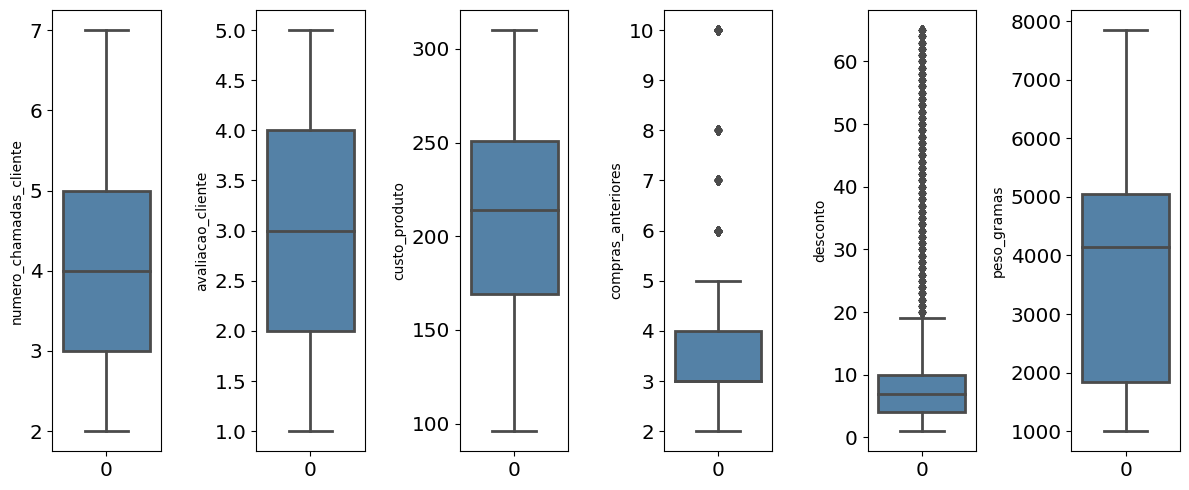

In [20]:
features = nums
for i in range(0, len(features)):
	plt.subplot(1, len(features), i + 1)
	plt.ylabel(features[i])
	sns.boxplot(df[features[i]], color='steelblue', orient='v')
	plt.tight_layout()


##### <font color='white'> Analise Univariada - Histograma Plots

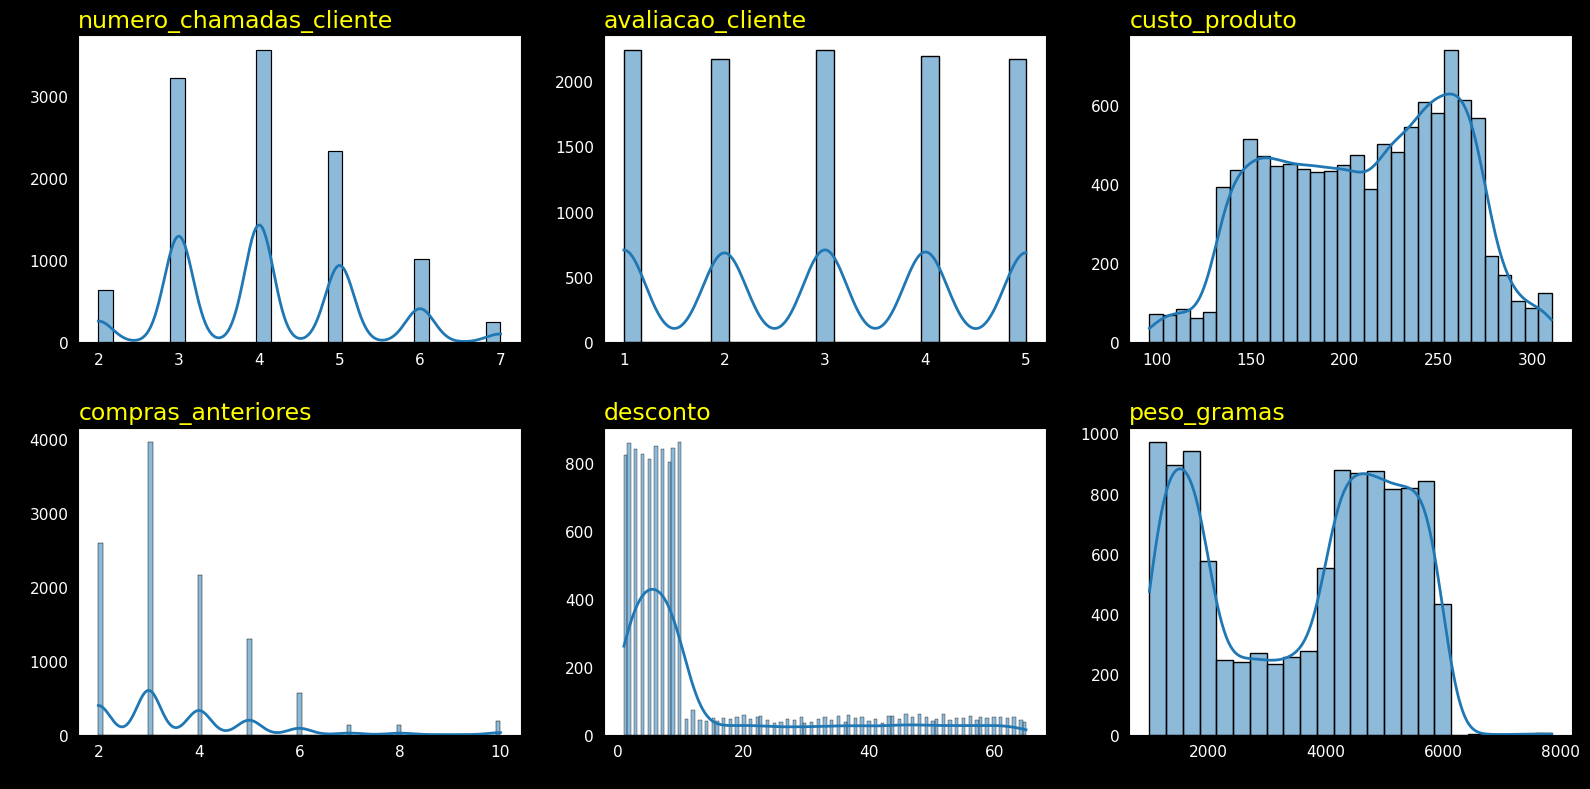

In [21]:
plt.figure(figsize=(16,8), facecolor='black')

for i in range(0, len(features)):
	plt.subplot(2,3, i+1)
	sns.histplot(df[features[i]], kde=True)
	plt.title(features[i], color='yellow', loc='left', size=17)
	plt.xticks(color='white', size=11)
	plt.yticks(color='white', size=11)
	plt.tight_layout()

##### <font color='white'> Analise Univariada - Violin Plots

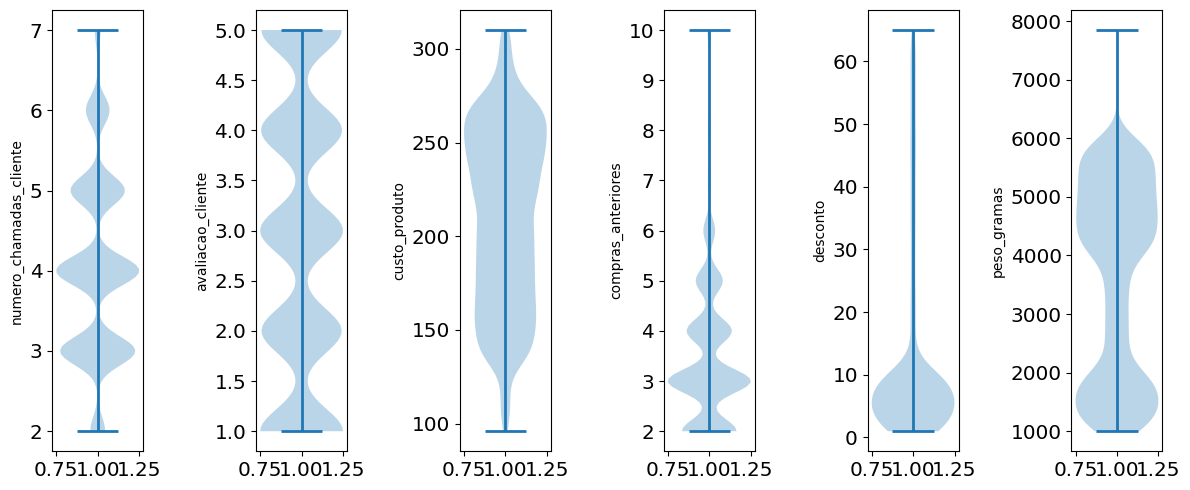

In [22]:
for i in range(0, len(features)):
	plt.subplot(1, len(features), i+1)
	plt.violinplot(df[features[i]])
	plt.ylabel(features[i])
	plt.tight_layout()

**Algumas observacoes:**

	1. As colunas numero_chamada_cliente e avaliacao_cliente possuem distribuicao uniforme.
	2. As colunas compras_anteriores e desconto possuem distribuicao assimetricas.
	3. A coluna peso_gramas possue formato de 'U', indicando incerteza sob sua distribuicao.
	4. A coluna custo_produto eh a unica que possui distribuicao proxima da distribuicao normal.

##### <font color='white'> Analise Univariada - Count Plot (Categorical)

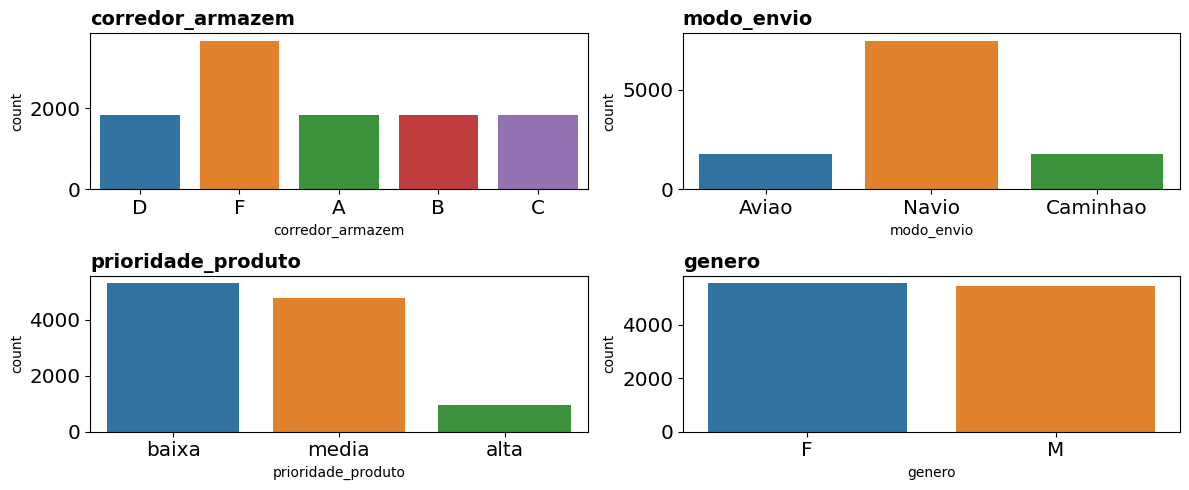

In [23]:
for i in range(0, len(cats)):
	plt.subplot(2,2, i+1)
	sns.countplot(x=df[cats[i]])
	plt.title(cats[i], loc='left', weight='bold', size=14)
	plt.tight_layout()

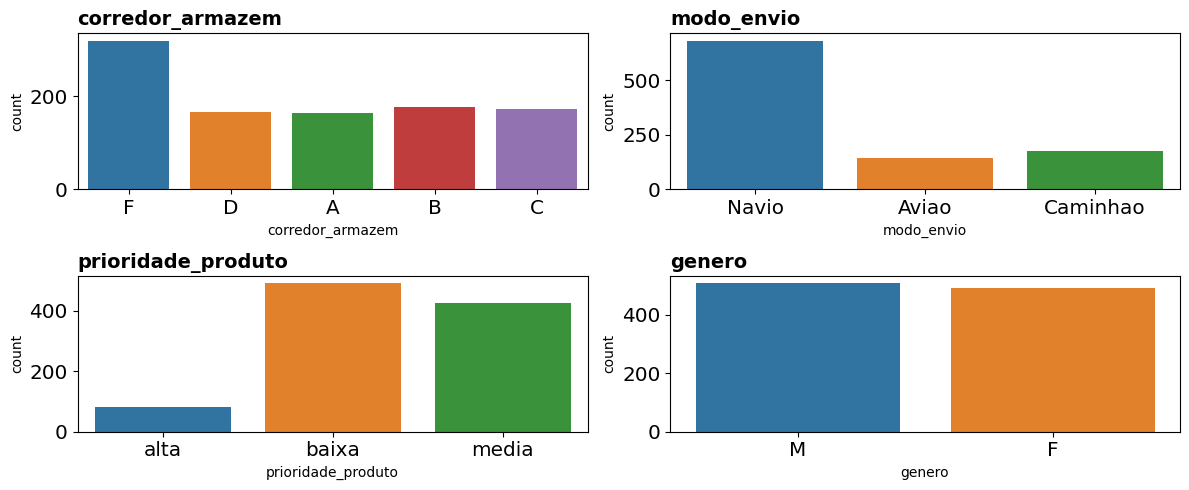

In [24]:
df_sample = df.sample(1000, random_state=42)
for i in range(0, len(cats)):
	plt.subplot(2,2, i+1)
	sns.countplot(x=df_sample[cats[i]])
	plt.title(cats[i], loc='left', weight='bold', size=14)
	plt.tight_layout()

<Axes: xlabel='entregue_no_prazo', ylabel='count'>

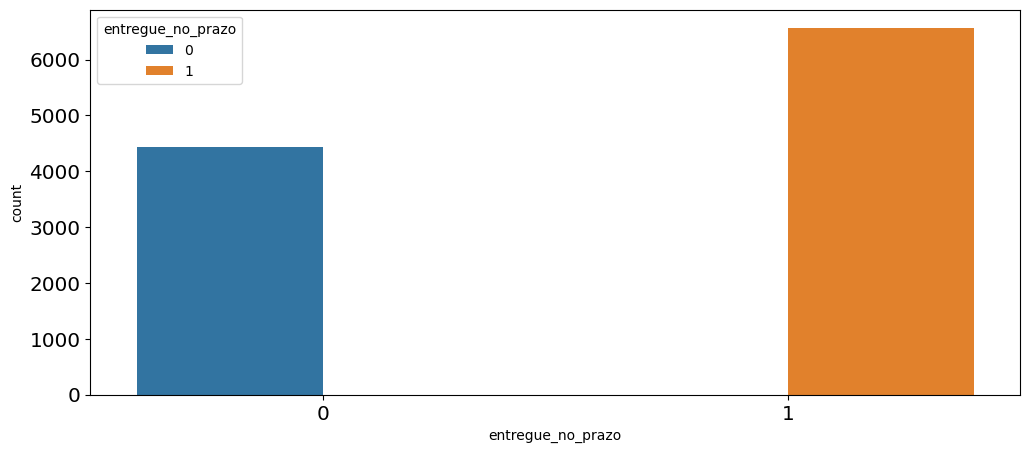

In [25]:
sns.countplot(df, x=df['entregue_no_prazo'], hue='entregue_no_prazo')

**Algumas observacoes:**

	Conforme ja haviamos averiguado, os graficos indicam:
	1. Que o corredor F possui maior fluxo de vendas
	2. Navio eh o principal modo de envio
	3. Prioridade baixa eh a prioridade com maior frequencia
	4. E entregas fora do prazo estao em evidencia 

##### <font color='white'> Analise Bivariada - Mapa de Correção

In [26]:
df[nums].corr()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


In [27]:
corr_df = df[nums].corr()

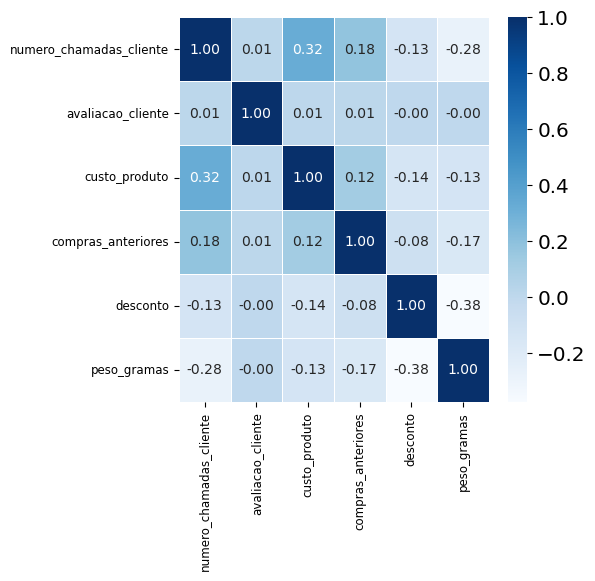

In [28]:
plt.figure(figsize=(5,5))
sns.heatmap(data=corr_df, annot=True, fmt='.2f', cmap='Blues', linecolor='white', linewidths=0.7)
plt.xticks(size=8.5)
plt.yticks(size=8.5)
plt.show()

**Algumas observacoes:**

	1. Ha uma leve correlacao positiva entre o num chamadas e o custo do produto, o que parece fazer sentido, quanto maior o custo do produto maior a qtde de chamadas dos clientes para acompanhar a entrega.
	2. Ha uma leve correlacao positiva entre o num chamadas e o peso em gramas, o que indica que quanto menor o peso, possivelmente menor o custo e menor o 'valor' do produto, indicando que ha menos ligacoes para produtos leves.
	3. Ha uma leva correlacao negativa entre o peso em gramas e o desconto, o que indica que quanto menor o peso, maior o desconto, o que faz sentido, considerando que quanto menor o peso do produto menor o custo de transporte, consequentemente, eh possivel maior desconto ao cliente.

	Importante: Nao usamos correlacao para variaveis categoricas, nesse caso usamos analise de associacao.

##### <font color='white'> Analise Bivariada - Pair Plot

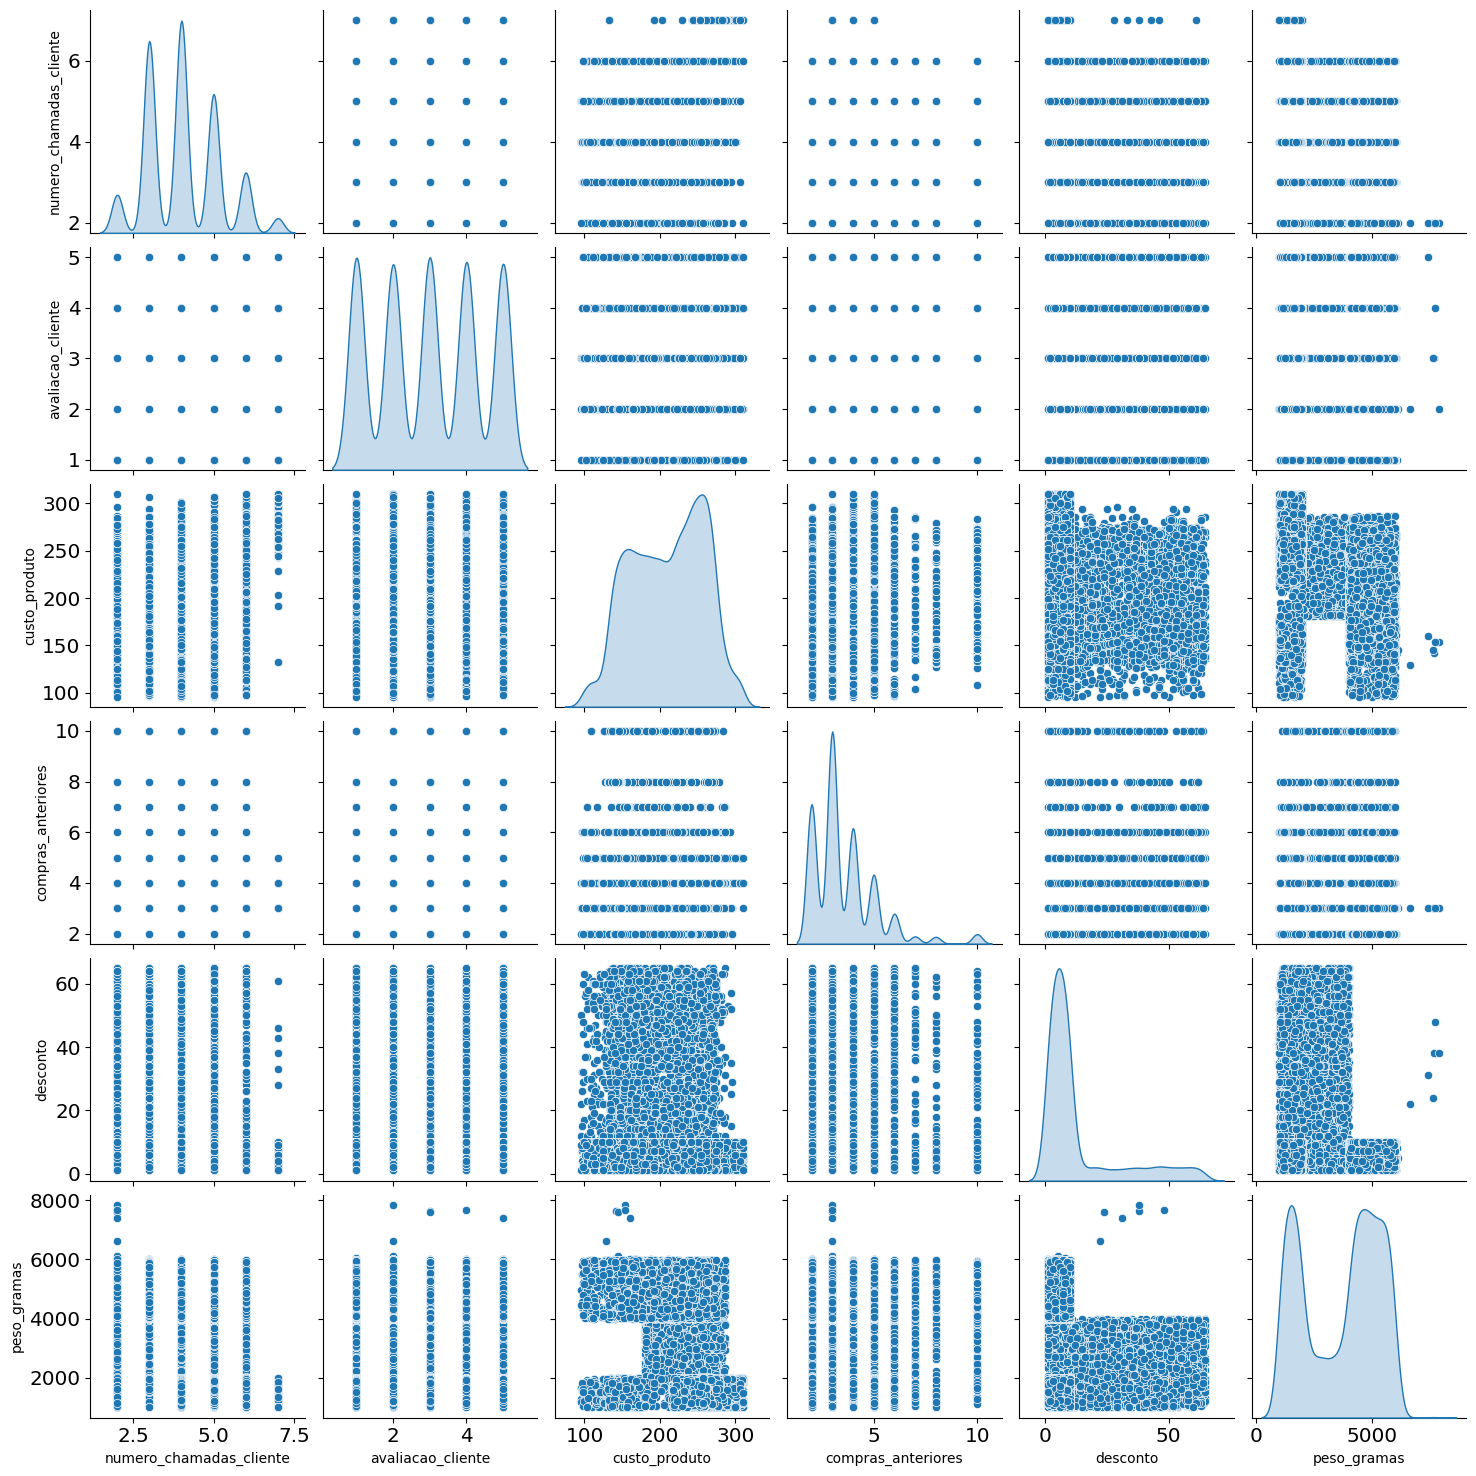

In [29]:
sns.pairplot(data=df[nums], diag_kind='kde')

##### <font color='white'> Colunas Categoricas x Variavel Target

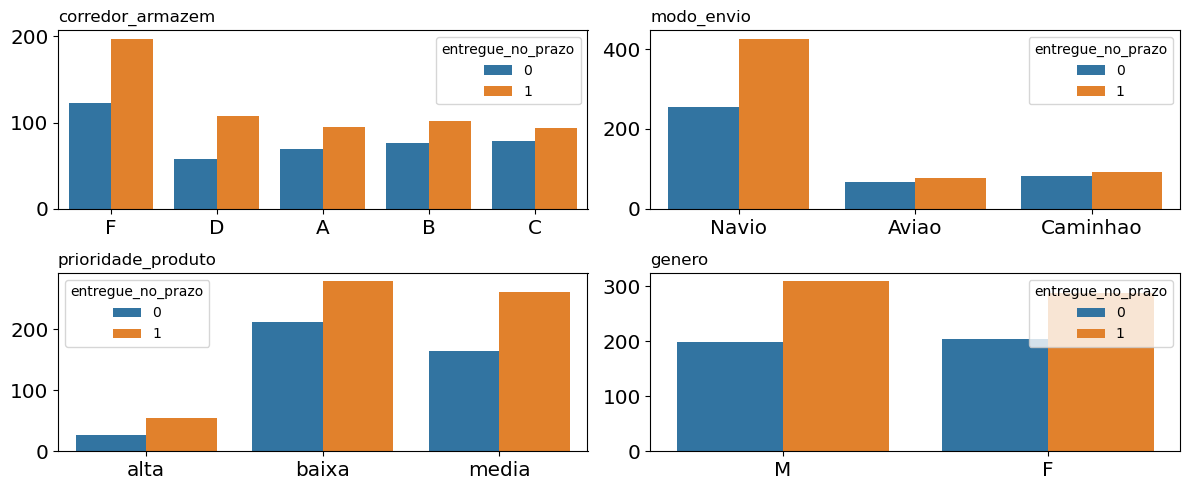

In [30]:
features = cats
for i in range(0, len(features)):
	plt.subplot(2, 2, i + 1)
	sns.countplot(data=df_sample, x=features[i], hue='entregue_no_prazo')
	plt.title(features[i], loc='left')
	plt.xlabel('')
	plt.ylabel('')
	plt.tight_layout()

In [31]:
round(df['entregue_no_prazo'].value_counts() / df['entregue_no_prazo'].value_counts().sum() * 100, 0)

entregue_no_prazo
1    60.0
0    40.0
Name: count, dtype: float64

**Algumas observacoes:**

	1. 40% de todas as entregas apresentam atraso.
	2. Navio eh o modo de envio que mais apresenta atraso (e tambem o maior volume de envios, gargalo? custo?)

In [32]:
df.groupby(['prioridade_produto','entregue_no_prazo'])['ID'].count()

prioridade_produto  entregue_no_prazo
alta                0                     332
                    1                     616
baixa               0                    2158
                    1                    3140
media               0                    1947
                    1                    2807
Name: ID, dtype: int64

In [33]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

**CONCLUSAO EDA PARTE 1**

	1. Os dados parecem validos e nao ha defeitos maiores/significativos (valores ausentes, outliers, etc)
	2. Existem algumas distribuicoes que sao um assimetricas, isso deve ser lembrado se usarmos modelos que exijam a suposicao de distribuicao normal.
	3. Nao dectamos problemas de multicolinearidade (correlacoes muito altas em diversas variaveis).
	4. Alguns recursos/variaveis parecem completamente nao correlacionados.
	5. Dos recursos categoricos, corredor_armazen, modo_envio e prioridade_produto parece uteis para prever a variavel target.

#### <font color='navy'> EDA - Parte 2

##### <font color='white'> Respondendo a perguntas de Negocios

##### 1. Os atrasos nas entregas estao igualmente distribuidos pelos modos de envio? Ha diferenca discrepante?

In [34]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [35]:
df.modo_envio.value_counts()

modo_envio
Navio       7463
Aviao       1777
Caminhao    1760
Name: count, dtype: int64

In [36]:
df.ID.duplicated().sum()

0

In [37]:
df.groupby(['entregue_no_prazo','modo_envio'])['ID'].count().reset_index()

,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [38]:
# tambem pode ser feito da forma abaixo, caso os valores a serem contados possuirem duplicidades que nao possam
# ser excluidas da base de dados
df_group1 = df.groupby(['entregue_no_prazo','modo_envio']).agg({'ID':'nunique'}).reset_index()
df_group1

,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [39]:
df_group2 = df.groupby('modo_envio')['ID'].count().reset_index()

In [40]:
df_group1 = df_group1.merge(df_group2, on='modo_envio')

In [41]:
df_group1

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,1777
1,1,Aviao,1069,1777
2,0,Caminhao,725,1760
3,1,Caminhao,1035,1760
4,0,Navio,3004,7463
5,1,Navio,4459,7463


In [42]:
df_group1['Percentual(%)'] = round(df_group1.ID_x / df_group1.ID_y * 100, 2)

In [43]:
df_group1.columns = ['Status de Entrega no Prazo','Modo de Envio','Total por Categoria','Total Geral','Percentual(%)']

In [44]:
df_group1

,Status de Entrega no Prazo,Modo de Envio,Total por Categoria,Total Geral,Percentual(%)
0,0,Aviao,708,1777,39.84
1,1,Aviao,1069,1777,60.16
2,0,Caminhao,725,1760,41.19
3,1,Caminhao,1035,1760,58.81
4,0,Navio,3004,7463,40.25
5,1,Navio,4459,7463,59.75


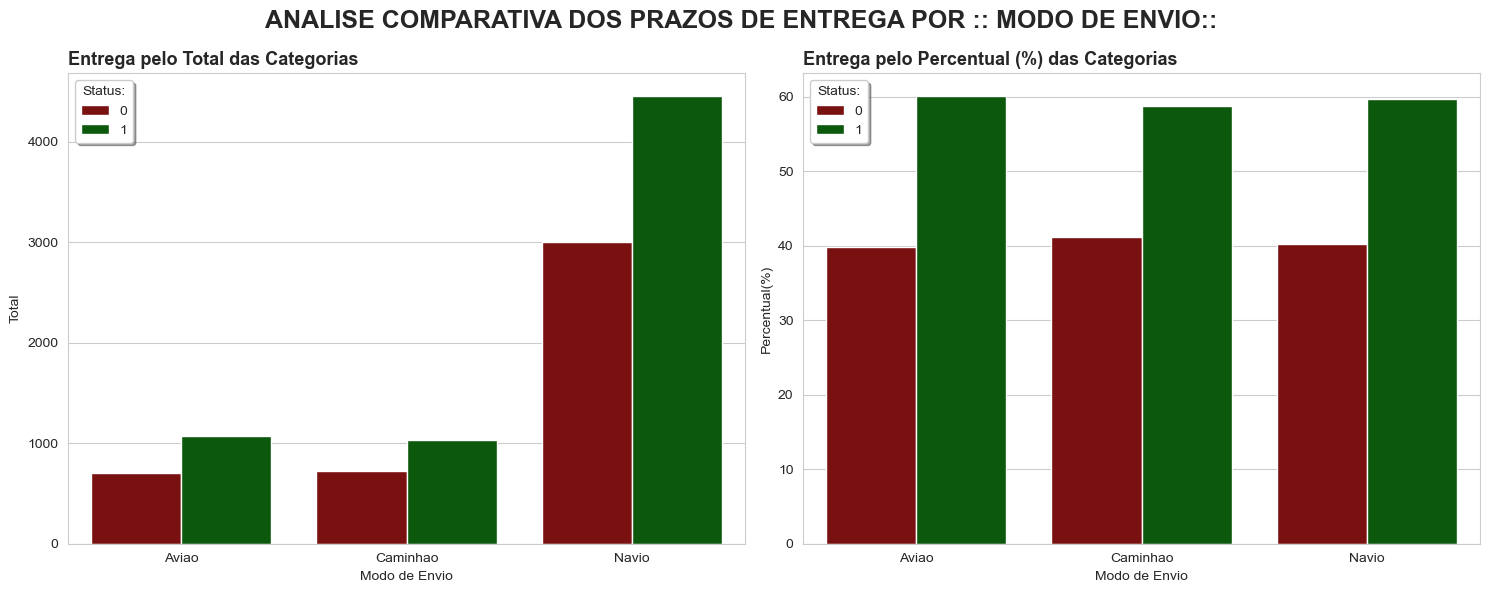

In [45]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
plt.suptitle('ANALISE COMPARATIVA DOS PRAZOS DE ENTREGA POR :: MODO DE ENVIO:: ', size=18, weight='bold')

plt.subplot(1,2,1)
sns.barplot(data=df_group1, 
			x='Modo de Envio', 
			y='Total por Categoria', 			
			hue='Status de Entrega no Prazo',
			palette=['darkred','darkgreen'])
plt.title('Entrega pelo Total das Categorias', weight='bold', loc='left', size=13)
plt.legend(title='Status:', shadow=True)
plt.xticks(size=10)
plt.yticks(size=10)
plt.ylabel('Total')

plt.subplot(1,2,2)
sns.barplot(data=df_group1, 
			x='Modo de Envio', 
			y='Percentual(%)', 
			hue='Status de Entrega no Prazo',
			palette=['darkred','darkgreen'])
plt.title('Entrega pelo Percentual (%) das Categorias', weight='bold', loc='left', size=13)
plt.legend(title='Status:', shadow=True)
plt.xticks(size=10)
plt.yticks(size=10)

plt.tight_layout()

##### 2. Ha diferenca significativa no atraso das entregas quando o produto tem prioridade baixa ou media?

In [46]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [47]:
df_group11 = df.groupby(['prioridade_produto','entregue_no_prazo']).agg({'ID':'nunique'}).reset_index()

In [48]:
df_group22 = df.groupby('prioridade_produto').agg({'ID':'nunique'}).reset_index()

In [49]:
df_group11 = df_group11.merge(df_group22, on='prioridade_produto')

In [50]:
df_group11['Percentual(%)'] = round(df_group11['ID_x'] / df_group11['ID_y'] * 100, 2)

In [51]:
df_group11.columns = ['Prioridade do Produto','Status Entrega no Prazo','Total por Categoria','Total Geral','Percentual(%)']

In [52]:
df_group11

,Prioridade do Produto,Status Entrega no Prazo,Total por Categoria,Total Geral,Percentual(%)
0,alta,0,332,948,35.02
1,alta,1,616,948,64.98
2,baixa,0,2158,5298,40.73
3,baixa,1,3140,5298,59.27
4,media,0,1947,4754,40.95
5,media,1,2807,4754,59.05


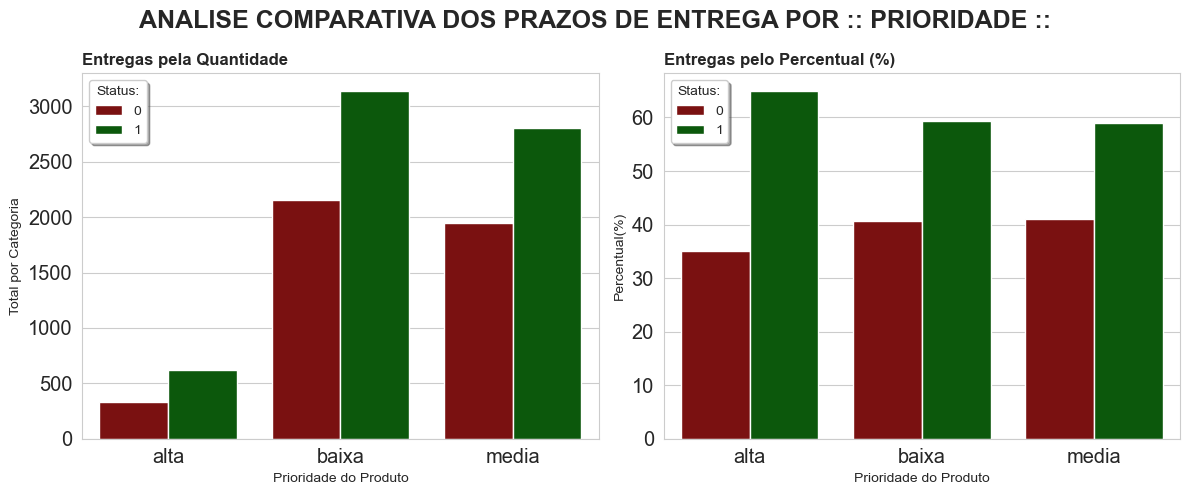

In [53]:
plt.suptitle('ANALISE COMPARATIVA DOS PRAZOS DE ENTREGA POR :: PRIORIDADE ::', size=18, weight='bold')

plt.subplot(1,2,1)
sns.barplot(df_group11, 
			x='Prioridade do Produto', 
			y='Total por Categoria', 
			hue='Status Entrega no Prazo',
			palette=['darkred','darkgreen'])
plt.title('Entregas pela Quantidade', loc='left', weight='bold')
plt.legend(title='Status:', shadow=True)

plt.subplot(1,2,2)
sns.barplot(df_group11, 
			x='Prioridade do Produto', 
			y='Percentual(%)', 
			hue='Status Entrega no Prazo',
			palette=['darkred','darkgreen'])
plt.title('Entregas pelo Percentual (%)', loc='left', weight='bold')
plt.legend(title='Status:', shadow=True)

plt.tight_layout()

##### 3. Quais corredores armazenam produtos com maior proporcao de entregas com atraso?

In [54]:
df_group111 = df.groupby(['entregue_no_prazo','corredor_armazem']).agg({'ID':'nunique'}).reset_index()

In [55]:
df_group222 = df.groupby(['corredor_armazem']).agg({'ID':'nunique'}).reset_index()

In [56]:
df_group111 = df_group111.merge(df_group222, on='corredor_armazem')

In [57]:
df_group111['Percentual(%)'] = round(df_group111['ID_x'] / df_group111['ID_y'] * 100, 2)

In [58]:
df_group111.columns = ['Status Entrega no Prazo','Corredor do Armazem','Total por Corredor','Total Geral','Percentual (%)']

In [59]:
df_group111

,Status Entrega no Prazo,Corredor do Armazem,Total por Corredor,Total Geral,Percentual (%)
0,0,A,758,1833,41.35
1,1,A,1075,1833,58.65
2,0,B,729,1833,39.77
3,1,B,1104,1833,60.23
4,0,C,740,1834,40.35
5,1,C,1094,1834,59.65
6,0,D,738,1834,40.24
7,1,D,1096,1834,59.76
8,0,F,1472,3666,40.15
9,1,F,2194,3666,59.85


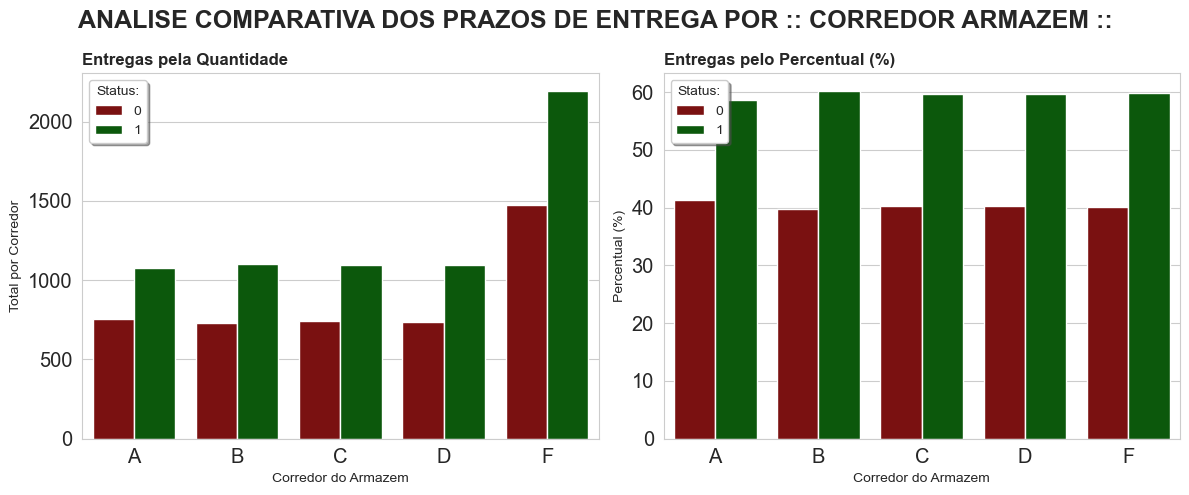

In [60]:
plt.suptitle('ANALISE COMPARATIVA DOS PRAZOS DE ENTREGA POR :: CORREDOR ARMAZEM ::', size=18, weight='bold')

plt.subplot(1,2,1)
sns.barplot(df_group111, 
			x='Corredor do Armazem', 
			y='Total por Corredor', 
			hue='Status Entrega no Prazo',
			palette=['darkred','darkgreen'])
plt.title('Entregas pela Quantidade', loc='left', weight='bold')
plt.legend(title='Status:', loc='best', shadow=True)

plt.subplot(1,2,2)
sns.barplot(df_group111, 
			x='Corredor do Armazem', 
			y='Percentual (%)', 
			hue='Status Entrega no Prazo',
			palette=['darkred','darkgreen'])
plt.title('Entregas pelo Percentual (%)', loc='left', weight='bold')
plt.legend(title='Status:', loc='upper left', shadow=True)

plt.tight_layout()

##### Como a densidade da variavel que representa *desconto* influencia o *status de entrega dos produtos*?

<Axes: title={'left': 'Mapa de Correlacao entre a Variavel Desconto e Entregue no Prazo'}>

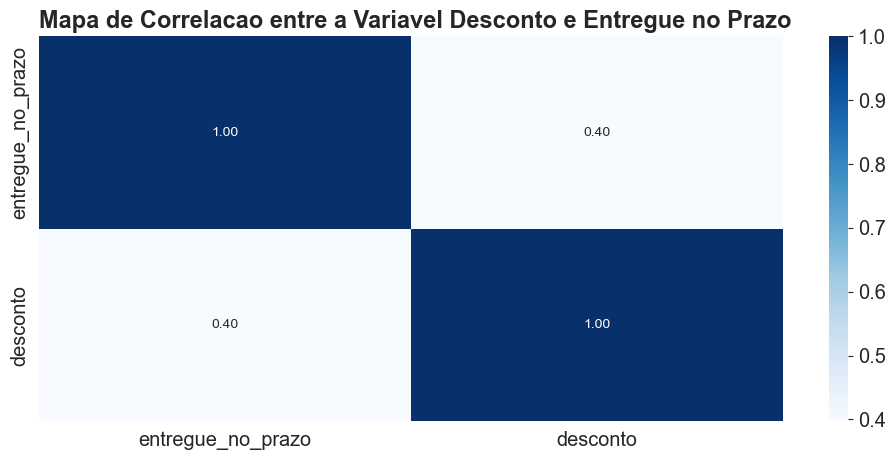

In [61]:
# heatmap (mapa de correlacao)
plt.title('Mapa de Correlacao entre a Variavel Desconto e Entregue no Prazo', size=17, weight='bold', loc='left')
sns.heatmap(df[['entregue_no_prazo','desconto']].corr(), annot=True, fmt='.2f', cmap='Blues')

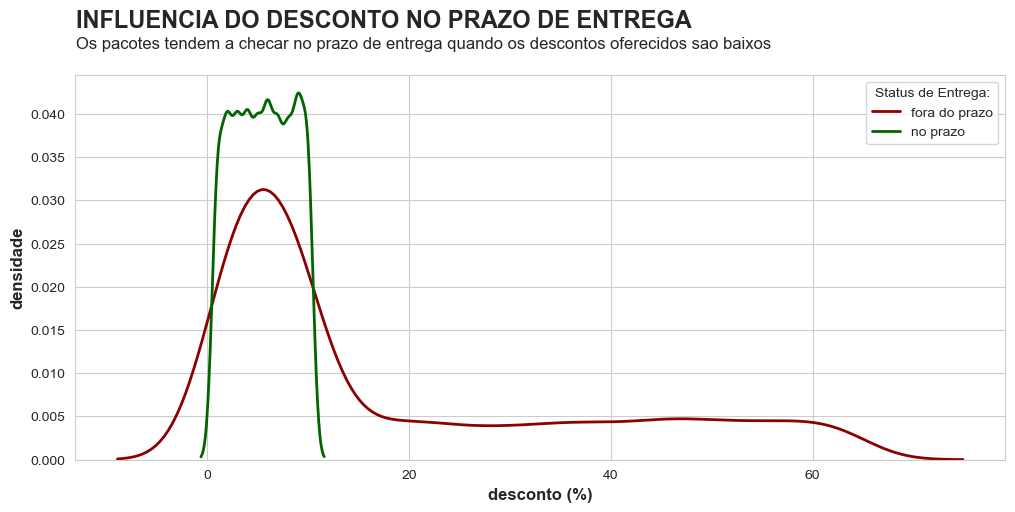

In [62]:
plt.text(x= -13, 
		 y= 0.050,
		 s='INFLUENCIA DO DESCONTO NO PRAZO DE ENTREGA', 
		 weight='bold', 
		 size=17)

plt.text(x= -13, 
		 y= 0.0476,
		 s='Os pacotes tendem a checar no prazo de entrega quando os descontos oferecidos sao baixos', 
		 size=12)


sns.kdeplot(data=df, 
			x='desconto', 
			hue='entregue_no_prazo', 
			palette=['darkgreen','darkred'])

plt.legend(loc='upper right', 
		   title='Status de Entrega:', 
		   labels=['fora do prazo','no prazo'])

plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('desconto (%)', size=12, weight='bold')
plt.ylabel('densidade', size=12, weight='bold')

plt.show()

##### <strong><em><snap style=color:navy> Conclusão da análise:
Decidi utilizar o heat para averiguar visualmente a correlacao entre as duas variaveis e o KDE para checar a distribuicao do desconoto a densidade do status de entrega, o resultado da analise eh que existe uma leve correcao positiva entre desconto e entrega no prazo, ENTRETANTO, eh importante lembrar que a variavel entrega no prazo esta representada como 0 = no prazo e 1 = fora do prazo, OU SEJA! A correlacao retorna um dado que pode confundir a analise, porem a analise responde a pergutna, pois conforme o coeficiente correlacao em 0.40, quanto maior o desconto, maior o prazo de entrega no prazo, ou seja, quanto maior o desconto, maior o probabilidade de atraso.